In [1]:
import torch as tr
from torch import nn
import matplotlib.pyplot as plt


In [2]:
weight = 0.7
bais = 0.3
start = 0
end = 1
step = 0.005
x = tr.arange(start,end,step).unsqueeze(dim=1)
# The linear regression fomula y = weight * x + bais
y = weight*x+bais
print(f"inputs_ \n{len(x[:10])}\n\n-------\n Outputs_\n {len(y[:10])}")

inputs_ 
10

-------
 Outputs_
 10


In [3]:
x[:5],y[:5]

(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200]]),
 tensor([[0.3000],
         [0.3035],
         [0.3070],
         [0.3105],
         [0.3140]]))

In [4]:
# Spiting Data
split_data = int(0.8*len(x))
x_train,y_train = x[:split_data],y[:split_data]
x_test,y_test =x[split_data:],y[split_data:]
len(x_train),len(x_test),len(y_train),len(y_test)

(160, 40, 160, 40)

In [5]:
def prediction_function(tr_data = x_train,
                       tr_label = y_train,
                       te_data = x_test,
                       te_label = y_test,
                       predictions = None):
    plt.figure(figsize = (10,9))
    plt.scatter(tr_data,tr_label,c='b',s = 4,label = "Training")
    plt.scatter(te_data,te_label,c='g',s = 4,label = "Testing")
    
    if predictions is not None:
        plt.scatter(te_data,predictions,s = 4,c='r',label = 'predictions')
    plt.legend(prop={'size':14});



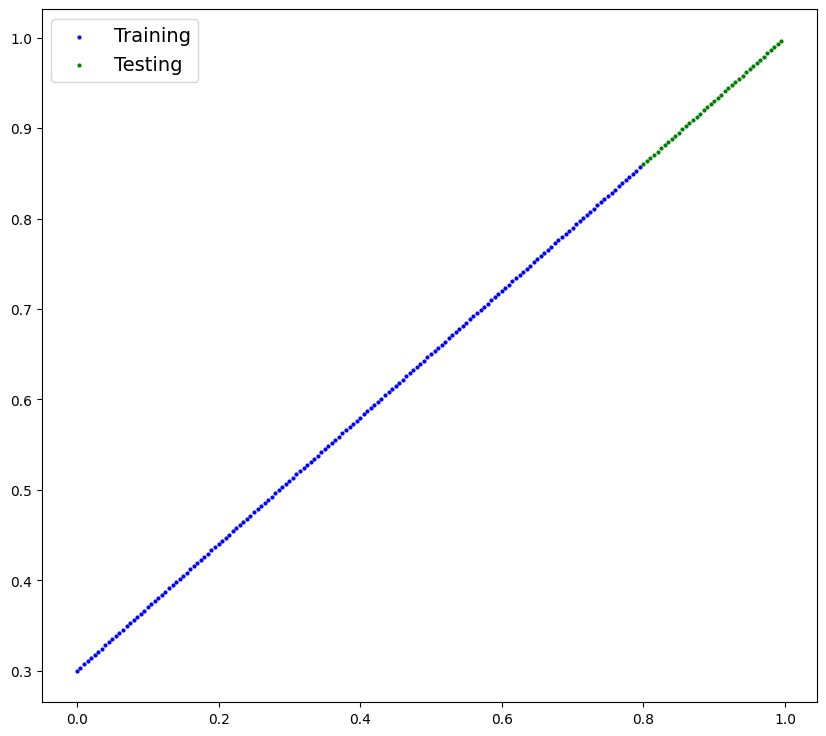

In [6]:
prediction_function()

In [7]:
import torch.nn.functional as f

### What our Modle does!
* Start with random values (weight & bais)
* Look at training data and adjust the random values to better.

 represent(or get closer to) the ideal valuse (The weight & bias values we used to create the data)

 ### How dose it work?
 Throught two main algorithms:
 1. Gradient descent is why we have requires_grad is True
 2. BackProbgation

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initiallize Model parameters
        self.weights = nn.Parameter(tr.randn(
            1,
            requires_grad = True,
            dtype=tr.float
        ))
        self.bais = nn.Parameter(tr.randn(
            1,
            requires_grad = True,
            dtype=tr.float
        ))

        # Forward method to define the computation in the model
    def forward(self,x: tr.Tensor):
        return self.weights * x + self.bais # This is the linearregression formula

### LinearRegressionModel class model explaintions
How does work nn.Module in the subclass?
1. Question1: How does work initialize model parameters
* Answer: initialize model parameters to be used in various computation(these could be different layesrs from torch.nn, single parameters, hard-coded values or functioms)
2. Question2: what does *`requires_grad=True`*?
* Answer: means PyTorch will track the gradient of this specific parameter for use with torch.autograd , and gradient descent (For many torch.nn modules, requires_grad = True is set by default)
3. Question3: what is forward?
* Answer: Any subclass of nn.module need to override forward() 

In [9]:
# Create a random seed
tr.manual_seed(42)
# Create an instance of the model (This is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
type(model_0.parameters())

generator

In [11]:
# List named parameters
# Weight and bais are our parameters name
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [12]:
weight,bais

(0.7, 0.3)

### sexth section
### Making prediction with our random using torch.inference_model()
* To check our model's preddictive power, let's see how we it predict `y_test` based on `x_test`.
* When we pass sata through our model, it's going to run it throught the forward() method. 

In [13]:
x_test

tensor([[0.8000],
        [0.8050],
        [0.8100],
        [0.8150],
        [0.8200],
        [0.8250],
        [0.8300],
        [0.8350],
        [0.8400],
        [0.8450],
        [0.8500],
        [0.8550],
        [0.8600],
        [0.8650],
        [0.8700],
        [0.8750],
        [0.8800],
        [0.8850],
        [0.8900],
        [0.8950],
        [0.9000],
        [0.9050],
        [0.9100],
        [0.9150],
        [0.9200],
        [0.9250],
        [0.9300],
        [0.9350],
        [0.9400],
        [0.9450],
        [0.9500],
        [0.9550],
        [0.9600],
        [0.9650],
        [0.9700],
        [0.9750],
        [0.9800],
        [0.9850],
        [0.9900],
        [0.9950]])

In [14]:
y_train.shape

torch.Size([160, 1])

In [97]:
with tr.inference_mode():
    y_pred = model_0(x_test)
# You can also do something similar eith torch.nn_grad(), however, inference_mode() is preferred.
# with tr.no_grad():
#     y_pred = model_0(x_test)
y_pred.shape

torch.Size([40, 1])

In [16]:
### To this cell we must find diffrence between x_test,y_test,pred_te.
## If available deffirence between our test and pred data, to our system happen error.
print(len(x_test),len(y_pred),len(y_test))

40 40 40


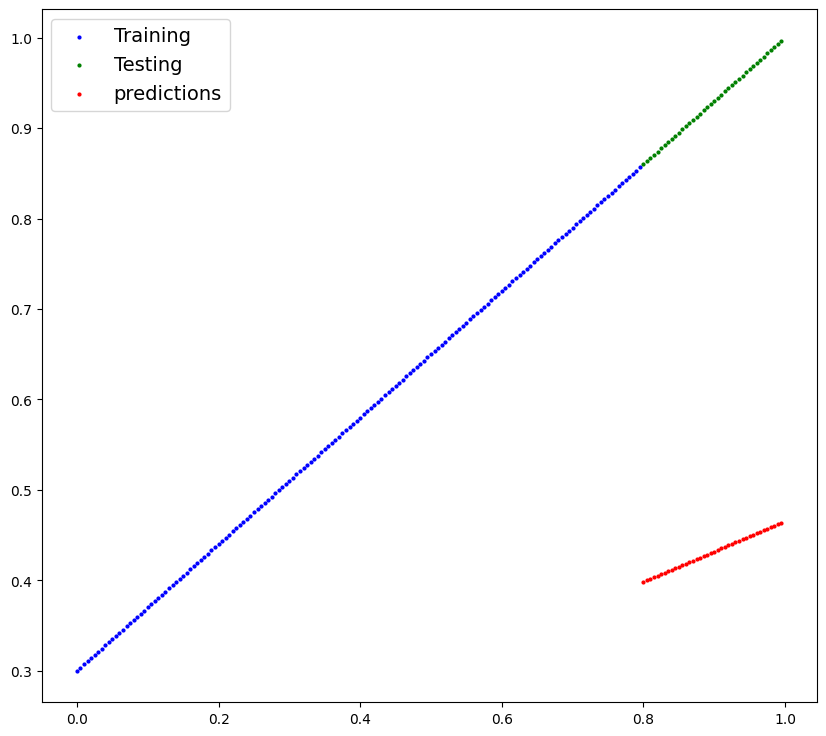

In [17]:
prediction_function(predictions = y_pred)

### Seventh section -> Training a model with PyTorch(intuition building)
*  The whole idea of training is for a model to move from some *Unknown* parametes *(these may be random)* to some *known* parameters.
* in the other words from a poor representation of the data to a better representation of the data.
* one way to measure hoe poor or how worng your models predictions are is use a loss function.
* -----
* Note: Loss function may also be called cost function or criterion in defferent areas. For our case, we're going to reffer to it as a loss function.
# **Thinks we need to train:**
*  *Loss Function:* A function to measure how worng your model's prediction are to ideal outputs, lower is better.
*  **Optimizer:** Takes into account the loss of a model and adjust the model's parameters(e.g weight
   & bais).
* IF we give a large number to learning rate Our Loss function become very large **This is a big problem, then we should give `0.01 - 0.001` rates for Learning rate in our model.**  
# specifically for PyTorch, we need to
*  Training loop
*  Testing loop

In [18]:
# setup a Loss Function
loss = nn.L1Loss()

In [19]:
loss

L1Loss()

In [20]:
# Setup an optumizer(stochastic gradient descent)
optimizer = tr.optim.SGD(params=model_0.parameters(), lr = 0.01) # lr = lerning rate

In [21]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Pytorch Trainig loop steps and intuition
* Q: Which loos be function and optimizer shoult i use?
* A: This will be problem specific. but with exprence, you'll get an idea of what works and what does'nt with your particular.

* A coupe of things we need in a training loop:
0. Loop throught the data
1. forward pass.
2. calculate the loos (compare forward pass prediction to ground trught labels)
3. Optimizer zero grad.
4. Loss backward - move backwards throught the network to calculate the gradient of each of the parameters of our model with.

In [61]:
# An epoch is one loop throught the data.....
epochs = 100
# Track different values
epoch_count = []
train_loss_values=[]
test_loss_values = []
# First:- loop throught the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode  in PyTorch sets all parameters that   require gradients to require gradient
    # 1. Forward pass
    y_pred = model_0(x_train)
    # 2. calculate the loss
    loss_ = loss(y_pred,y_train)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Preform backpropagation on the loss with respect to the parameters of the model
    loss_.backward()
    # 5. step the optimizer -> performing gradient descent 
    optimizer.step()
    # Testing Code 
    
    model_0.eval() # turn off different setting in the model not needed for evaluation/testing (dropout/batch norm layers )
    with tr.inference_mode():
        # 1. do the forward
        test_pred = model_0(x_test)
        # 2. calculate the Loss
        test_loss = loss(test_pred,x_test)
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss_)
        test_loss_values.append(test_loss )
        print(f'Epoch: {epoch} | loss: {loss_} | Test_loss: {test_loss}')
        print(f'Epoch {epoch+1}, Loss = {loss_.item()}')

Epoch: 0 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 1, Loss = 0.005554556380957365
Epoch: 10 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 11, Loss = 0.005554556380957365
Epoch: 20 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 21, Loss = 0.005554556380957365
Epoch: 30 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 31, Loss = 0.005554556380957365
Epoch: 40 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 41, Loss = 0.005554556380957365
Epoch: 50 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 51, Loss = 0.005554556380957365
Epoch: 60 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 61, Loss = 0.005554556380957365
Epoch: 70 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 71, Loss = 0.005554556380957365
Epoch: 80 | loss: 0.005554556380957365 | Test_loss: 0.03516141697764397
Epoch 81, Loss = 0.005554556380957365
Epoch: 90 | 

### Explain about the PyTorch testing loop
`epoch_count = []
train_loss_values=[]
test_loss_values = []`
* Create empty lists for sorting useful values (helpful for tracking model pregress)
#      ``Model eval()``
* Tell the model we want to evaluate rather then train (this turns off functionality used for training but bot evaution )

In [62]:
import numpy as np
np.array(tr.tensor(train_loss_values).cpu().numpy()), test_loss_values

(array([0.00555456, 0.00555456, 0.00555456, 0.00555456, 0.00555456,
        0.00555456, 0.00555456, 0.00555456, 0.00555456, 0.00555456],
       dtype=float32),
 [tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352),
  tensor(0.0352)])

In [63]:
epoch_count

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [64]:
test_loss_values

[tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352),
 tensor(0.0352)]

In [65]:
train_loss_values

[tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>),
 tensor(0.0056, grad_fn=<MeanBackward0>)]

In [66]:
print(f'Loss: {loss_}') 

Loss: 0.0060254791751503944


### Reviewing the steps in a PyTorch training loop


In [67]:
model_0.eval()


LinearRegressionModel()

In [68]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6928])), ('bais', tensor([0.2973]))])

In [69]:
with tr.inference_mode():
    y_preds = model_0(x_test)
y_preds.shape

torch.Size([40, 1])

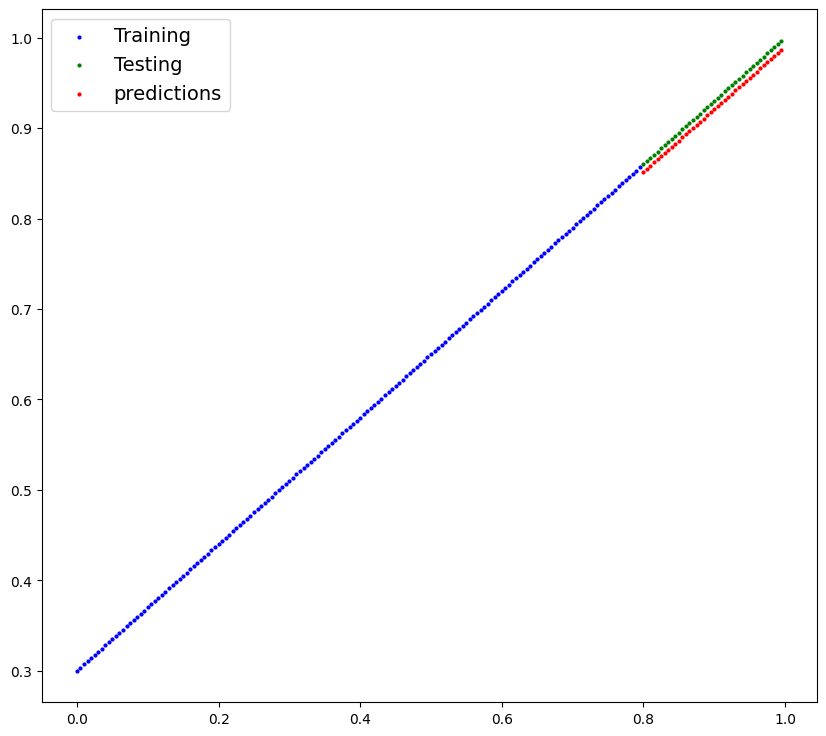

In [70]:
prediction_function(predictions = y_preds)

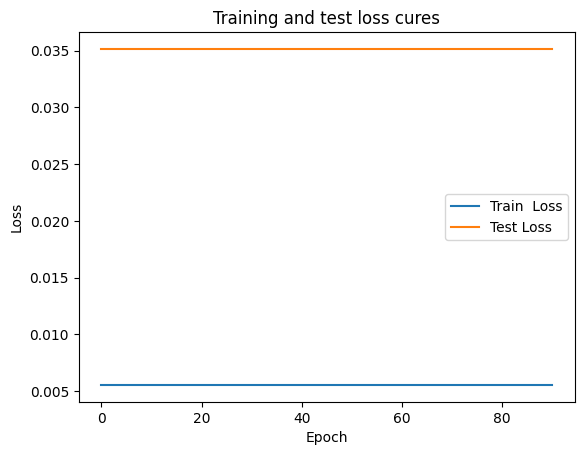

In [71]:
plt.plot(epoch_count, np.array(tr.tensor(train_loss_values).cpu().numpy()), label = "Train  Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss cures")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

###  Saving a model PyTorch
There are three main methods ypu should about for saving  and loading models in PyTorch.
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()
4. We use form pathlib for saving the path of our model --> `from pathlib import path`

In [81]:
from pathlib import Path
# 1. Create model diroctory
Model_path = Path("models")
Model_path.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
Model_Name = "First-pytorch-model-linear_regressing.ipynb"
Model_save_path = Model_path/Model_Name
print(f'Saving model to: {Model_save_path}')
tr.save(obj = model_0.state_dict(), f= Model_save_path)

Saving model to: models\First-pytorch-model-linear_regressing.ipynb


This is the link of our it file -http://localhost:8888/files/Artificial%20intellence%20With%20Musa%20Rasa/PytorchPractice/models/First-pytorch%20model%20for%20linear%20regressing.pth?_xsrf=2%7C376c80db%7C81454ebd543a8f1be4bb30f7c27610b2%7C1770612597

### Loaded a model

In [84]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(tr.load(f = Model_save_path))

<All keys matched successfully>

In [86]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6928])), ('bais', tensor([0.2973]))])

In [91]:
loaded_model_0.eval()
with tr.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds.shape

torch.Size([40, 1])

In [98]:
# Compare loaded model preds with origenal preds
y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [101]:
y_pred[2] , loaded_model_preds[2]

(tensor([0.8585]), tensor([0.8585]))

In [102]:
y_pred[9] , loaded_model_preds[9]

(tensor([0.8827]), tensor([0.8827]))

In [108]:
dot = np.dot(y_pred.T,loaded_model_preds)
# dot = sum(y_pred.T * loaded_model_preds)
dot

C:\Users\Musa\AppData\Local\Temp\ipykernel_8732\1595445678.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dot = np.dot(y_pred.T,loaded_model_preds)


array([[33.8533]], dtype=float32)